## Task 2: Exploratory Data Analysis (EDA)

Conduct an EDA to gain insight about the structure, distribution, types and patterns of the dataset

- **Dataset**: `test(labeled).csv`
- **Outputs**: Tables and visualizations highlighting insights


In [8]:
# Setup and load data
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('test(labeled).csv')

# Parse dates and add features
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
else:
    df['date'] = pd.NaT

# Try body for text length; fallback to Subject if no body
text = df.get('body')
if text is None:
    text = df.get('Subject')
else:
    empty_mask = text.isna() | (text.astype(str).str.strip() == "")
    subj = df.get('Subject')
    if subj is not None:
        text = text.mask(empty_mask, subj)

text = text.fillna("").astype(str)

df['num_words'] = text.str.split().apply(len)

df.head()

,Subject,body,date,from,sentiment_compound,sentiment_label,num_words
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,0.8172,Positive,101
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,0.4215,Positive,57
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,0.0000,Neutral,21
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com,0.0000,Neutral,24
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com,0.2500,Positive,42


In [2]:
# Structure summary
print("Shape of Dataset:", df.shape)
print("Column Data types:\n", df.dtypes)

print("\nMissing values:")
missing = df.isna().sum()
display(missing.head(4).to_frame("Number of Missing Values"))

# Duplicate detection
dup_full = df.duplicated().sum()
key_cols = [c for c in ['Subject', 'date', 'from'] if c in df.columns]
if key_cols:
    dup_keys = df.duplicated(subset=key_cols).sum()
else:
    dup_keys = np.nan

print(f"\nDuplicates (full row): {dup_full}")
print(f"Duplicates (by {key_cols}): {dup_keys}")

print("\nPreview:")
display(df.sample(min(5, len(df)), random_state=42))


Shape of Dataset: (2191, 7)
Column Data types:
 Subject                       object
body                          object
date                  datetime64[ns]
from                          object
sentiment_compound           float64
sentiment_label               object
num_words                      int64
dtype: object

Missing values:


,Number of Missing Values
Subject,0
body,0
date,0
from,0



Duplicates (full row): 0
Duplicates (by ['Subject', 'date', 'from']): 4

Preview:


,Subject,body,date,from,sentiment_compound,sentiment_label,num_words
382,RE: Thursday,"Yes'em, I is here. Bout to go to lunch! Frid...",2010-11-19,bobette.riner@ipgdirect.com,-0.3987,Negative,24
632,RE: Hey Man,"I'm in for Wed. night Kick Off Dance, tell me ...",2010-07-23,lydia.delgado@enron.com,0.0000,Neutral,17
1670,(No Subject),http://atlas.spaceports.com/~cfarley/tbs.htm,2011-03-29,bobette.riner@ipgdirect.com,0.0000,Neutral,1
211,EnTelligence WebSite,We're trying to get a demo setup - probably fo...,2010-01-14,eric.bass@enron.com,0.8720,Positive,68
1488,Expense Report for Stephen Schwarz Dated 12/20/99,Approved. Pls. process. Thx. Sally Beck\n\n,2011-07-07,rhonda.denton@enron.com,0.6808,Positive,6


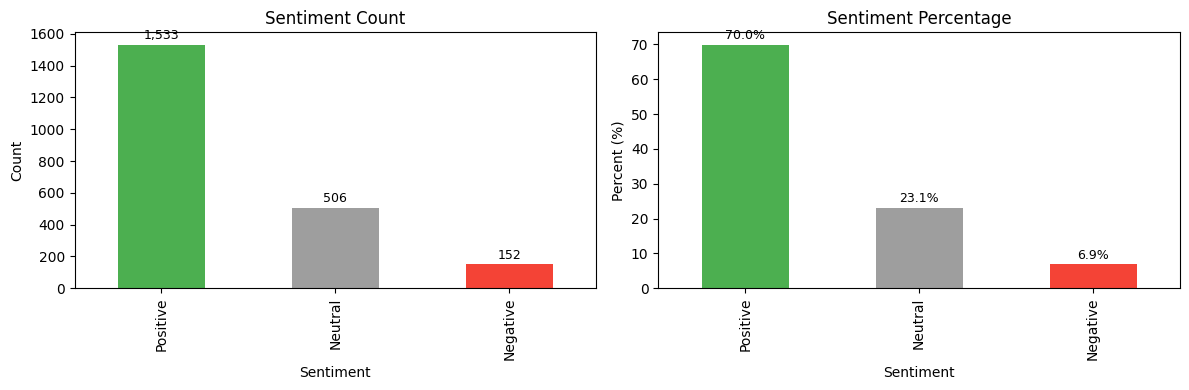

,count,percent
sentiment_label,,
Positive,1533,69.97
Neutral,506,23.09
Negative,152,6.94


In [3]:
# Sentiment distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

order = ["Positive", "Neutral", "Negative"]
value_counts = df['sentiment_label'].value_counts().reindex(order)
value_counts.plot(kind='bar', ax=ax[0], color=["#4CAF50", "#9E9E9E", "#F44336"])
ax[0].set_title("Sentiment Count")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Sentiment")

pct = (value_counts / value_counts.sum() * 100).round(2)
(pct).plot(kind='bar', ax=ax[1], color=["#4CAF50", "#9E9E9E", "#F44336"])
ax[1].set_title("Sentiment Percentage")
ax[1].set_ylabel("Percent (%)")
ax[1].set_xlabel("Sentiment")

for i, v in enumerate(value_counts.fillna(0)):
    ax[0].text(i, v + max(1, 0.01 * value_counts.max()), f"{int(v):,}", ha='center', va='bottom', fontsize=9)
for i, v in enumerate(pct.fillna(0)):
    ax[1].text(i, v + max(0.1, 0.01 * pct.max()), f"{v:.1f}%", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Table version
summary_table = pd.DataFrame({
    'count': value_counts,
    'percent': pct
})
display(summary_table)


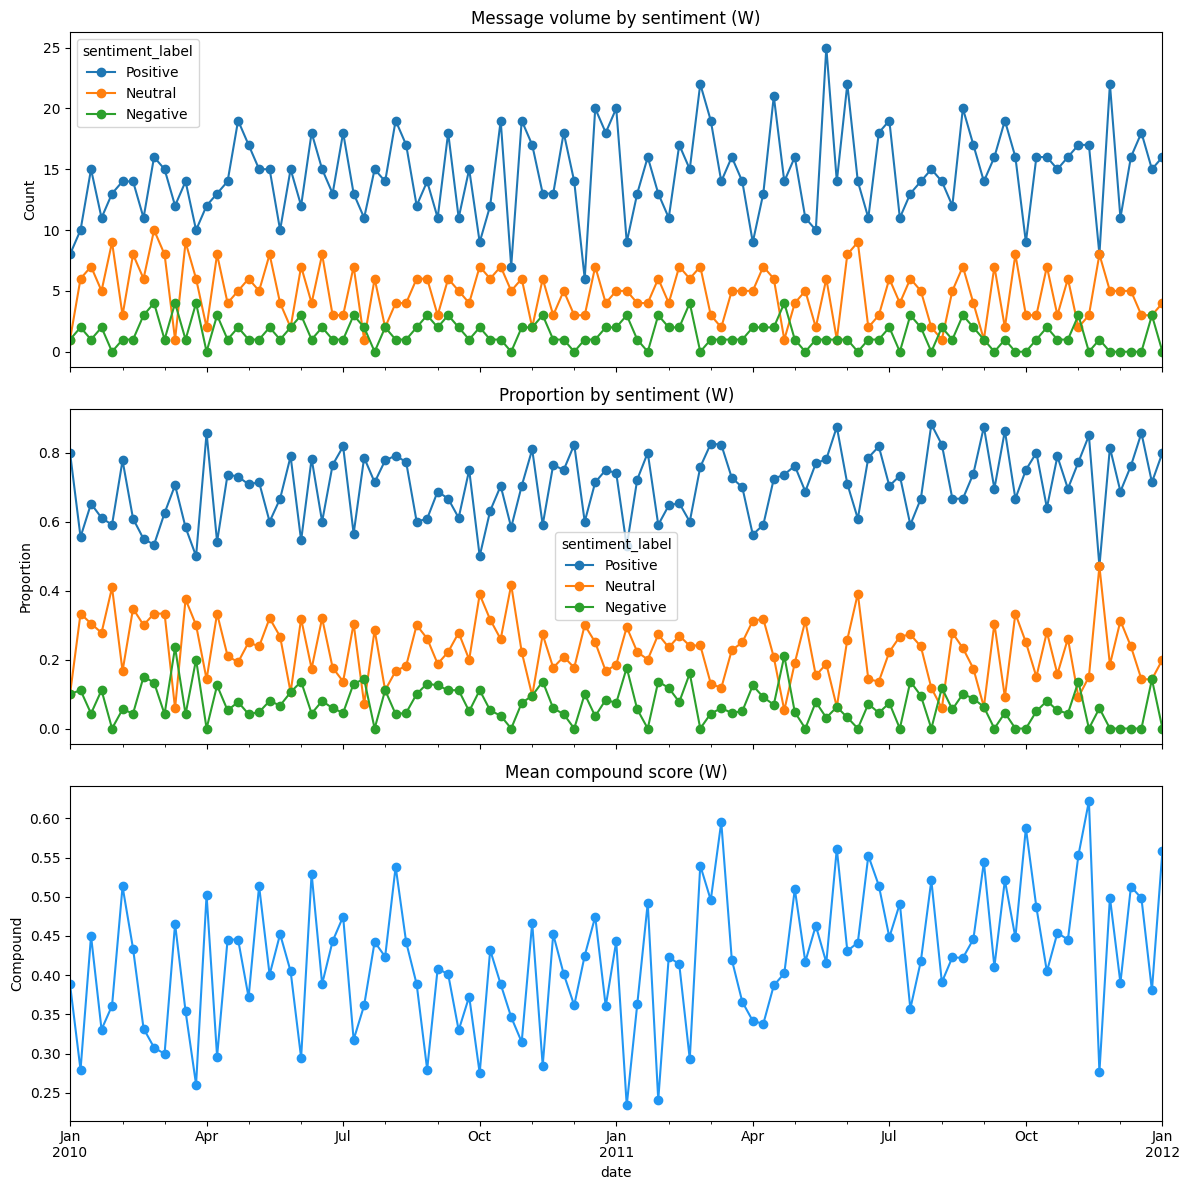

sentiment_label,Positive,Neutral,Negative
period,,,
2011-12-04,11,5,0
2011-12-11,16,5,0
2011-12-18,18,3,0
2011-12-25,15,3,3
2012-01-01,16,4,0


sentiment_label,Positive,Neutral,Negative
period,,,
2011-12-04,0.687500,0.312500,0.000000
2011-12-11,0.761905,0.238095,0.000000
2011-12-18,0.857143,0.142857,0.000000
2011-12-25,0.714286,0.142857,0.142857
2012-01-01,0.800000,0.200000,0.000000


,mean_compound
date,
2011-12-04,0.390175
2011-12-11,0.512952
2011-12-18,0.498300
2011-12-25,0.380552
2012-01-01,0.558755


In [4]:
# Trends over time
# Choose a time grain based on data span
date_col = 'date'
valid_dates = df[date_col].dropna()

if valid_dates.empty:
    print("No valid dates available for time trends.")
else:
    span_days = (valid_dates.max() - valid_dates.min()).days
    if span_days <= 60:
        freq = 'D'
    elif span_days <= 730:
        freq = 'W'
    else:
        freq = 'M'

    # Aggregate counts by date and sentiment
    counts = (df.dropna(subset=[date_col])
                .groupby([pd.Grouper(key=date_col, freq=freq), 'sentiment_label'])
                .size()
                .unstack(fill_value=0)
                .reindex(columns=["Positive", "Neutral", "Negative"]))

    counts.index.name = 'period'

    # Proportions per period
    props = counts.div(counts.sum(axis=1), axis=0).fillna(0)

    # Mean compound per period
    mean_compound = (df.dropna(subset=[date_col])
                       .groupby(pd.Grouper(key=date_col, freq=freq))['sentiment_compound']
                       .mean())

    fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

    counts.plot(ax=axes[0], marker='o')
    axes[0].set_title(f"Message volume by sentiment ({freq})")
    axes[0].set_ylabel("Count")

    props.plot(ax=axes[1], marker='o')
    axes[1].set_title(f"Proportion by sentiment ({freq})")
    axes[1].set_ylabel("Proportion")

    mean_compound.plot(ax=axes[2], color="#2196F3", marker='o')
    axes[2].set_title(f"Mean compound score ({freq})")
    axes[2].set_ylabel("Compound")

    plt.tight_layout()
    plt.show()

    display(counts.tail(5))
    display(props.tail(5))
    display(mean_compound.tail(5).to_frame('mean_compound'))


,count
from,
lydia.delgado@enron.com,284
john.arnold@enron.com,256
sally.beck@enron.com,227
patti.thompson@enron.com,225
bobette.riner@ipgdirect.com,217
johnny.palmer@enron.com,213
don.baughman@enron.com,213
eric.bass@enron.com,210
kayne.coulter@enron.com,174


,negative_rate
from,
kayne.coulter@enron.com,0.097701
sally.beck@enron.com,0.096916
bobette.riner@ipgdirect.com,0.096774
johnny.palmer@enron.com,0.079812
don.baughman@enron.com,0.075117
patti.thompson@enron.com,0.071111
lydia.delgado@enron.com,0.052817
eric.bass@enron.com,0.047619
john.arnold@enron.com,0.042969


ValueError: Could not interpret value `text_len_words` for `y`. An entry with this name does not appear in `data`.

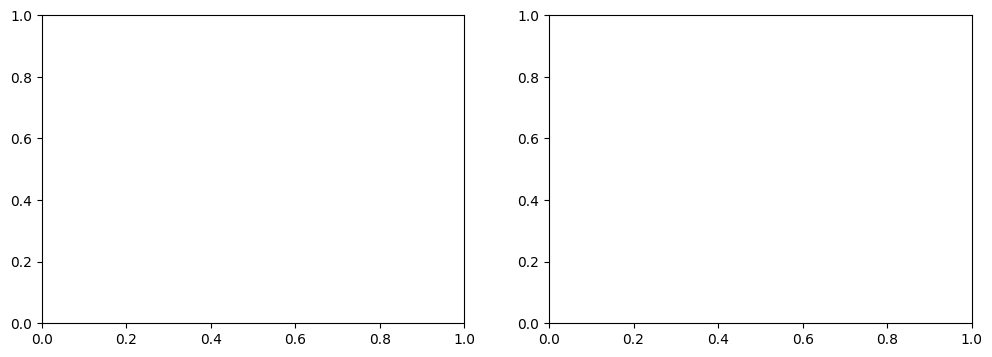

In [5]:
# Additional patterns and anomalies
# Top senders by volume and by negative rate
if 'from' in df.columns:
    sender_counts = df['from'].value_counts().head(10)
    display(sender_counts.to_frame('count'))

    neg_rate = (df.assign(is_neg=df['sentiment_label'].eq('Negative'))
                  .groupby('from')['is_neg']
                  .mean()
                  .sort_values(ascending=False)
                  .head(10))
    display(neg_rate.to_frame('negative_rate'))
else:
    print("No 'from' column present to analyze senders.")

# Text length distributions by sentiment
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(data=df, x='sentiment_label', y='text_len_words', order=["Positive", "Neutral", "Negative"], ax=ax[0])
ax[0].set_title('Words per message by sentiment')
ax[0].set_xlabel('Sentiment')
ax[0].set_ylabel('Words')

sns.boxplot(data=df, x='sentiment_label', y='text_len_chars', order=["Positive", "Neutral", "Negative"], ax=ax[1])
ax[1].set_title('Characters per message by sentiment')
ax[1].set_xlabel('Sentiment')
ax[1].set_ylabel('Characters')

plt.tight_layout()
plt.show()

# Potential anomalies: extremely short or long messages
short_msgs = df.nsmallest(5, 'text_len_words')[['Subject', 'text_len_words', 'sentiment_label']]
long_msgs = df.nlargest(5, 'text_len_words')[['Subject', 'text_len_words', 'sentiment_label']]

print("Shortest messages:")
display(short_msgs)
print("\nLongest messages:")
display(long_msgs)
